In [1]:
%%HTML
<script src="require.js"></script>

In [2]:
from IPython.display import display, HTML
HTML(
    """
    <script
        src='https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js'>
    </script>
    <script>
        code_show=true;
        function code_toggle() {
        if (code_show){
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
        } else {
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
        }
        code_show = !code_show
        }
        $( document ).ready(code_toggle);
    </script>
    <form action='javascript:code_toggle()'>
        <input type="submit" value='Click here to toggle on/off the raw code.'>
    </form>
    """
)

In [3]:
# Import libraries
import os
import time
import re

import json
from json.decoder import JSONDecodeError
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances

<center><img src = 'logo.png'></center>


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>EXECUTIVE SUMMARY</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

<center>The eCommerce market in the Philippines, especially on platforms like LAZADA, has grown a lot recently. This growth means more competition, making it tough for online sellers to stand out. <b>Our project aims to create a system to help these sellers pick the right product categories and set the best prices</b> to do well in this busy market.<br><br>

<center>In this project, we worked on understanding and organizing a large amount of data from LAZADA. We used techniques called <b>bag-of-words</b> and <b>TF-IDF</b> to turn product descriptions into a format that a computer can understand and analyze. This was part of our process of collecting, cleaning, and studying the data to get useful insights. Our focus was on the most popular items and the top layers of product categories to keep our analysis clear and relevant.<br><br>

<center>The result of our work was a big improvement in how accurately we could recommend product categories and prices. By switching to the TF-IDF method, our system’s ability to correctly categorize products went <b>from 46% to over 60%</b>. We also achieved <b>65% accuracy</b> in matching products to the right categories, which is really good. This means our system can now give online sellers in the Philippines much better advice on what to sell and at what price, helping them to be more successful in the competitive eCommerce world.<br><br>


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>PROBLEM STATEMENT</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

<center>As the Philippines emerges from the COVID-19 pandemic, its eCommerce sector has expanded rapidly, offering new opportunities for online sellers. The significant increase in online business registrations, rising from 500,000 to over a million in just two years, highlights the sector's accessibility and appeal to entrepreneurs. eCommerce has become attractive due to its ease of entry and cost-effectiveness, attracting a wide range of businesses.<br><br>However, this rapid growth has also brought about increased competition, making it a level playing field for businesses of all sizes. To succeed in this evolving market, businesses need to focus on strategic product positioning, category selection, and smart pricing. Success in eCommerce in the Philippines now requires careful planning and a good understanding of technology, alongside entrepreneurial drive.<br><br>
The team aims to answer the following question:

<center><h3 style='background-color: #2D0151; color: white; padding-left:10px'><br>In the competitive e-commerce markets,<br><br><b>how can online sellers select the right product categories and pricing strategies<br> to maximize their growth in this vibrant eCommerce space?<br></h3>
    



<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>MOTIVATION</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

<center>The Philippines' eCommerce sector has grown rapidly after the COVID-19 pandemic, creating a competitive environment for online sellers. This project aims to develop an information retrieval system to help these sellers find the best categories and pricing for their products. The system will analyze market data to provide tailored recommendations, simplifying decision-making for sellers in choosing product categories and setting prices.<br><br>

<center><b>The goal is to help both new and experienced entrepreneurs navigate the online market more effectively. By offering insights into current market trends and consumer preferences, the system will guide sellers in making more informed choices, potentially increasing their sales and market presence.</b><br><br>

<center>This tool will also be useful for government bodies, policymakers, and researchers, offering them a clearer understanding of the digital economy's dynamics. It will provide valuable data on consumer behavior and market trends, contributing to broader knowledge about eCommerce in the Philippines post-pandemic.<br><br>


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>METHODOLOGY OVERVIEW</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

Represented in <b>Table 1. Methology Overview</b> are the steps the team has taken to address the problem statement.

<center><h5><b>Table 1. Methology Overview</b></h5></center>

| <center>Step</center> | <center>Process</center> | <center>Description</center> |
|:--|:-----------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------|
| 1 | Data Extraction and Cleaning | Extract category tree data from Lazada API and use data to webscrape listings and category details from Lazada website                               |
| 2 | Exploratory Data Analysis    | Perform EDA to gain understanding on the data and its characteristics, and identify any trends                                                       |
| 3 | Data Vectorization           | Represent text as vectors through bag-of-words representation with and without TF-IDF                                                                |
| 4 | Results                      | Utilize cosine similarity measures to identify top similar listings to search query, evaluate performance generate recommended categories and prices |
| 5 | Insights and Recommendation  | Summarize the insights from the generated results, and provide recommendations given the insights acquired                                           |



<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>DATA SCOPE AND LIMITATIONS</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

* The data from Lazada is limited to just the top performers in terms of Sales and mostly promoted by Lazada.
* This data is further limited to just the first 5 pages of each category.
* The categories and subcategories are limited to 3 levels only, anything further than that has been dropped.
    * From 4,800+ unique category paths, the category paths were successfully reduced down to 1,300+.
* Some features (Price and discount rate) vary based on the date of extraction.


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>DATA EXTRACTION AND CLEANING</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

The data extraction and cleaning process was conducted in three main phases:
1. Initial data on the category tree of Lazada was extracted from the Lazada API.
2. Using information gathered from the category tree, the team utilized the `get` function from the imported `requests` library to webscrape the listings data of the first five pages for every category path.
3. For category paths with missing entries, the team utilized the `get` function to collect the first five pages based on the Lazada search query to obtain the link for the category path landing page.


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h2>LAZADA CATEGORY TREE DATA</h2>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Extract Category Tree Data from Lazada API</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

The initial data was extracted by gaining access to the Lazada API available to Lazada sellers and developers. Part of the available information in the Lazada API includes the category tree, with details of the category name, ID, and its sub-categories or "children". The data can be access via the API via the following steps:

1. Select "Philippines" as the Region.
2. To create an app key, apply first in content management.
3. This will provide access to management of product listing, including product title, image, or price. 
4. It will take utmost 3 working days in the approval.
5. Type '/category/attributes/get' in API Path.
6. HTTP Method is automatically GET.
7. Click 'Access Token' and the it will be generated.
8. Set Parameters primary_category_id and language_code to 8704 and en_US respectively.

The request is illustrated as well in the <b>Figure 1. Lazada API Category Tree Request Get.</b>

<center><img src='lzd_api.png' width="1200" height="500">

<center><h5><b>Figure 1. Lazada API Category Tree Request Get</h5></center>

In [4]:
with open('lazada_category_tree.json', 'r') as json_file:
    lzd_cat_tree = json.load(json_file)

Loading the JSON file obtained from the API, we can view a snapshot from the Lazada Category Tree on the available details.

In [5]:
lzd_cat_tree['data'][0]['children'][0]['children'][0]['children']

[{'var': False, 'name': 'Tents', 'leaf': True, 'category_id': 7665},
 {'children': [{'var': False,
    'name': 'Sleeping Bags',
    'leaf': True,
    'category_id': 7666},
   {'var': False,
    'name': 'Air Mattresses',
    'leaf': True,
    'category_id': 10120},
   {'var': False, 'name': 'Sleeping Pads', 'leaf': True, 'category_id': 10121},
   {'var': False,
    'name': 'Pillows & Accessories',
    'leaf': True,
    'category_id': 10122},
   {'var': False, 'name': 'Cots', 'leaf': True, 'category_id': 21730},
   {'var': False, 'name': 'Hammocks', 'leaf': True, 'category_id': 21731}],
  'var': False,
  'name': 'Sleeping Gear',
  'leaf': False,
  'category_id': 10119},
 {'var': False,
  'name': 'Shelters & Canopies',
  'leaf': True,
  'category_id': 10128},
 {'children': [{'var': False,
    'name': 'Backpack covers',
    'leaf': True,
    'category_id': 14532},
   {'var': False,
    'name': 'Hiking Backpacks',
    'leaf': True,
    'category_id': 21733},
   {'var': False,
    'name': 'H


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Consolidate Category Path strings and corresponding Category IDs per path into Dictionary</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [6]:
def generate_category_paths(cat_dict, current_cat_path=''):
    """Generate category paths from parent category until last sub-category"""
    cat_path_list = []
    current_cat_path += cat_dict['name']
    
    if 'children' in cat_dict:
        for child in cat_dict['children']:
            cat_path_list.extend(
                generate_category_paths(child, current_cat_path + ' > '))

    if 'leaf' in cat_dict and cat_dict['leaf']:
        cat_path_list.append(current_cat_path)

    return cat_path_list

In [7]:
all_cat_path_list = []

for main_cat in lzd_cat_tree['data']:
    all_cat_path_list.extend(generate_category_paths(main_cat))

In [8]:
def generate_category_id_paths(cat_dict,
                               current_cat_path='',
                               current_id_path=''):
    """Generate category ID paths from parent category until last sub-category"""
    id_path_list = []
    current_cat_path += cat_dict['name']
    current_id_path += str(cat_dict['category_id'])
    
    if 'children' in cat_dict:
        for child in cat_dict['children']:
            id_path_list.extend(
                generate_category_id_paths(
                    child, current_cat_path + ' > ', current_id_path + ' > '))

    if 'leaf' in cat_dict and cat_dict['leaf']:
        id_path_list.append(current_id_path)

    return id_path_list

In [9]:
all_id_path_list = []

for main_cat in lzd_cat_tree['data']:
    all_id_path_list.extend(generate_category_id_paths(main_cat))

In [10]:
cat_id_path_dict = dict(zip(all_cat_path_list, all_id_path_list))

Using the category tree obtained from the API, the complete category & sub-category combinations were consolidated into corresponding paths alongside the corresponding category IDs. The two sets of data were zipped into a dictionary, with keys referring to the category path and values as the category ID paths.

The functions `generate_category_paths` and `generate_category_id_paths` were run to generate the two lists before being zipped.

Displayed below is a sample snippet of the resulting Lazada Category Path-ID dictionary.

In [11]:
list(cat_id_path_dict.items())[:5]

[('Sports & Outdoors > Outdoor Recreation > Camping & Hiking > Tents',
  '4623 > 7654 > 7657 > 7665'),
 ('Sports & Outdoors > Outdoor Recreation > Camping & Hiking > Sleeping Gear > Sleeping Bags',
  '4623 > 7654 > 7657 > 10119 > 7666'),
 ('Sports & Outdoors > Outdoor Recreation > Camping & Hiking > Sleeping Gear > Air Mattresses',
  '4623 > 7654 > 7657 > 10119 > 10120'),
 ('Sports & Outdoors > Outdoor Recreation > Camping & Hiking > Sleeping Gear > Sleeping Pads',
  '4623 > 7654 > 7657 > 10119 > 10121'),
 ('Sports & Outdoors > Outdoor Recreation > Camping & Hiking > Sleeping Gear > Pillows & Accessories',
  '4623 > 7654 > 7657 > 10119 > 10122')]

In [12]:
print(
    f'Total number of category & sub-category combinations: '
    f'{len(cat_id_path_dict)}')

Total number of category & sub-category combinations: 4489


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Limit Category Paths to Maximum Three Levels</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [13]:
third_level_dict = {key: value for key, value in cat_id_path_dict.items()
                    if key.count('>') <= 2}

The data was further reduced in scope by limiting the category paths explored down to the third level maximum.

Displayed below is a sample snippet of the resulting reduced Lazada Category Path-ID dictionary, from 4,800+ category paths down to 1,300+.

In [14]:
list(third_level_dict.items())[:10]

[('Mobiles & Tablets > Landline Phones', '5116 > 5118'),
 ('Mobiles & Tablets > Tablets', '5116 > 5120'),
 ('Mobiles & Tablets > Smartphones', '5116 > 5121'),
 ('Mobiles & Tablets > Feature Phones', '5116 > 42006401'),
 ('Computers & Laptops > Desktops Computers > All-In-One',
  '5141 > 5148 > 11151'),
 ('Computers & Laptops > Desktops Computers > Gaming Desktops',
  '5141 > 5148 > 11153'),
 ('Computers & Laptops > Desktops Computers > DIY', '5141 > 5148 > 11155'),
 ('Computers & Laptops > Laptops > Gaming Laptops', '5141 > 5149 > 7093'),
 ('Computers & Laptops > Laptops > Traditional Laptops',
  '5141 > 5149 > 11147'),
 ('Computers & Laptops > Laptops > 2-in-1s', '5141 > 5149 > 13836')]

In [15]:
print(f'Reduced number of category & sub-category combinations: '
      f'{len(third_level_dict)}')

Reduced number of category & sub-category combinations: 1365



<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Consolidate Last Category Name of each Category Path</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [16]:
third_level_cat_list = [re.search(r'[^>]+$', cat_path).group().strip()
                        for cat_path in third_level_dict.keys()]
third_level_cat_unique = sorted(list(set(third_level_cat_list)))

In preparation for the webscraping process, the unique third level category names must be consolidated. These will be utilized as part of the endpoint in the `requests.get` functionality.

Displayed below is a sample snippet of the unique third level categories, from 1,300+ category paths down to 1,200+.

In [17]:
third_level_cat_unique[:10]

['2-in-1s',
 '3-D Puzzles',
 '360 Cameras',
 '3D Glasses',
 '3D Printer Parts',
 '3D Printers',
 '3D Printing Materials',
 'Accessories',
 'Action',
 'Action Figures']

In [18]:
print(f'Number of unique third level categories: {len(third_level_cat_unique)}')

Number of unique third level categories: 1202



<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h2>LAZADA LISTINGS DATA PER CATEGORY PATH</h2>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Webscrape the Listing details per Lazada Category Path</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [19]:
def webscrape_category_listings(start, end, headers):
    """Webscrape Lazada website based on third level category name"""
    start_index = start
    end_index = end
    conso_df = pd.DataFrame()

    for product_to_categorize in third_level_cat_unique[start_index:end_index]:
        product_to_categorize = (product_to_categorize
                                 .strip()
                                 .lower()
                                 .replace(' & ', '-')
                                 .replace(' ', '-')
                                 .replace(',', ''))
        products_info = []

        for page_number in list(range(1, 6)):
            try:
                lzd = requests.get(
                    f'https://www.lazada.com.ph/shop-{product_to_categorize}/'
                    f'?ajax=true&isFirstRequest=true&page={page_number}',
                    headers=headers).json()
                time.sleep(10)

            except JSONDecodeError as e:
                print(f'JSONDecodeError: {e} - category {start}')
                continue

            for item in lzd.get('mods', {}).get('listItems', []):
                info = {
                    'name': item.get('name', ''),
                    'item_id': item.get('itemId', ''),
                    'category_id': item.get('categories', ''),
                    'discount': item.get('discount', ''),
                    'rating_score': item.get('ratingScore', ''),
                    'original_price': item.get('originalPrice', ''),
                    'price': item.get('price', ''),
                    'item_sold_count': item.get('itemSoldCntShow', ''),
                    'temp_category_index': f'{start}'
                }
                products_info.append(info)

        df = pd.DataFrame(products_info)
        conso_df = pd.concat([conso_df, df], ignore_index=True)
        start += 1
        
    return conso_df

In [20]:
# Initialize with the following sample parameters
headers = {
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cookie': ('__wpkreporterwid_=3fe582be-6d6e-463d-3dd1-7ba13b5f49ff; lzd_cid'
               '=c1add782-8880-4a9d-d2bb-4f998db23cac; t_uid=c1add782-8880-4a9d'
               '-d2bb-4f998db23cac; t_fv=1700280938528; lwrid=AQGL4KQwN3O1ot2bK'
               '%2Fk8X39uI9jH; hng=PH|en-PH|PHP|608; userLanguageML=en; cna=aij'
               'fHTBRfhwCAZJYTCK8Xjwt; _bl_uid=sjlw3p763azjLddv7lz8891g7F3t; __'
               'itrace_wid=4233bd3d-25b0-4ee9-1268-986e501061b0; _gcl_au=1.1.21'
               '01806292.1700281477; _uetvid=6ba4d9c085ca11eebfadd5053eb33830; '
               '_fbp=fb.2.1700281493102.857291082; sgcookie=E100FFrZs3pSnXrfa2Q'
               '2e%2Bre9%2FsIir3s1C7cJ8gyw8N7OMRCBzqJVoFhm2eUXftZ4YyNV0uOqIh%2B'
               'KIxoC92rlMcbcajjzryCMH2lYyYlCUC%2FIuQ%3D; pdp_sfo=1; lzd_sid=16'
               '2bc36d95867700f181066e84f26ad3; _tb_token_=ee7eb7896fe78; xlly_'
               's=1; tfstk=dHDyqBXhILpzir4W672U3K10An28eRL_-vaQxDm3Vz4lFT_ngq3F'
               'A3LpwjzEoqP3Rvwu-Mumx7b7F06ETD4VdzaB2xPERVB7rvodLkmnJ3UB2Ii-2Je'
               'H5FweC7nJwTY653qYOm2LKFT6OwnUKJ3wy0ARUS3PvT9uMFmToYKhjxUN3yaVKO'
               'SY470eBrWHIxrrIPXNEwE09vMKawfUZoE45n-4GuITT; t_sid=0FQ3cJ68EG1q'
               'kLeMDfm3pOBWZ3FLai4t; utm_channel=NA; _m_h5_tk=fa815492ff2071e1'
               '41c62cb96ab0ecc3_1700766922943; _m_h5_tk_enc=095022a4c1e0fc028d'
               '7df7af3bcb3df5; epssw=1*ic1611iDjCECG_GS7zFQK79Stdfw8Pz4IlmYNez'
               '4urz8BgedNR_8uVz8t0wTfhdWH96VIL5jgzJS11Gz1Apx7UeoHfBW-5CWH1BWsC'
               'nPE91G_rYp3hYKNtCOeGxGf8tGj3mOvpCt9rLauayuv1Rug5NYmahdkQURII7_-'
               '20krTB4hUHJ3zQRxDDR3DqheKz5PKBvetzRGbvOGb1j_Q1JcPczBF3tet4Rh43-'
               'yaBp; isg=BLe3W9-qntHRBRpaw_-3p1ODRqsBfIve2IjgfAlk0wbtuNf6EUwbL'
               'nWemhDma2NW'),
    'Referer': 'https://www.lazada.com.ph/',
    'Sec-Ch-Ua': ('"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";'
                  'v="24"'),
    'Sec-Ch-Ua-Mobile': '?0',
    'Sec-Ch-Ua-Platform': '"Windows"',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'User-Agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                   'AppleWebKit/537.36 (KHTML, like Gecko) '
                   'Chrome/119.0.0.0 Safari/537.36'),
    'X-Csrf-Token': 'ee7eb7896fe78',
    'X-Requested-With': 'XMLHttpRequest'
}

start_1 = 300
end_1 = 301

start_2 = 305
end_2 = 306

In [21]:
sample_webscrape_df_1 = webscrape_category_listings(start_1, end_1, headers)

In [22]:
sample_webscrape_df_2 = webscrape_category_listings(start_2, end_2, headers)

With the third level category names consolidated, the initial webscrape run can be initiated, with the steps as follows.


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>1. Each category name is converted into a format that can be inputted into the target endpoint of the `requests.get` function, as presented in Table 2.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

<center><h5><b>Table 2. Lazada API Category Tree Request Get</h5></center>

| <center>Sample Input</center> | <center>Reformatted Input</center> |
|:---------------------------|:------------------------|
| Landline Phones            | landline-phones         |
| 3-D Puzzles                | 3-d-puzzles             |
| Art Pads, Diaries & Folios | art-pads-diaries-folios |


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>2. Once the endpoint is created, a request is created to the Lazada URL endpoint to arrive at the category path landing page.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* The process takes advantage of the identified pattern in the endpoint for the landing page of each category path combination.
* Categories are pulled in small sets in order to manage potential errors resulting from Captcha requests from the Lazada website.
* Cookies are updated every few pulls in order to manage potential errors resulting from Captcha requests from the Lazada website.
    
    <b>NOTE:</b> Headers are unique per user and must be updated in order to run the code successfully.

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>3. The process will iterate through each of the listings in the first landing page and collect the request info such as the product name, category_id path, price and other details.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>
<br>
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>4. After retrieving all relevant info from the first page, the process iterates through the remaining of the first five pages of the requested category path and saved into a dataframe.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>
<br>
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>5. Lastly, the generated DataFrame is saved into a CSV file, for consolidation once all runs have been completed.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* Method to save DataFrames into CSV files per pull in order to avoid loss of data in case of crash

Displayed below are two sample snippets of the listings info collected, returning DataFrames from the function `webscrape_category_listings`.

In [23]:
sample_webscrape_df_1.head()

,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count,temp_category_index
0,SRG Christmas Giving Tree P10,3354849788,"[12576, 24735, 21018201]",,5.0,,10,93 sold,300
1,Spring Rain Global: Care for the Indigenous Pe...,723918107,"[12576, 24735, 21018201]",,5.0,,500,19 sold,300
2,1 Dollar per Day for 100 Days Campaign by SRG,4222496808,"[12576, 24735, 21018201]",,0,,50,,300
3,Spring Rain Global Care for Disaster Response ...,1407070805,"[12576, 24735, 21018201]",,4.921568627450981,,20,227 sold,300
4,5 PESOS FOR DUMAGAT COMMUNITY IN NAKAR BULACAN,2985533224,"[12576, 24735, 21018201]",,0,,5,18 sold,300


In [25]:
sample_webscrape_df_2.head()

,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count,temp_category_index
0,180ml Kuelox Fixative Spray For Sketch/Gouache...,2206122392,"[22393, 22430, 22744]",24% Off,4.879432624113475,139,105.04,721 sold,305
1,"Crayola Crayons Set of 8, 16 or 24 colors",2716668362,"[22393, 22430, 22744]",63% Off,4.946356951871658,39,14.47,"9,999+ sold",305
2,24 Colors Alcohol Marker Art Marker Highlighte...,3617947502,"[22393, 22430, 22744]",55% Off,5.0,200,89.63,94 sold,305
3,Professional sketchbook Thick paper 160 notebo...,3709686910,"[22393, 22430, 22744]",76% Off,4.928571428571429,199,48,402 sold,305
4,"Crayola Crayons Set of 8, 16 or 24 colors",2716702418,"[22393, 22430, 22744]",62% Off,4.949335889360537,39,14.77,100k+ sold,305


In [24]:
sample_webscrape_df_1.to_csv(f'{start_1}-{end_1-1}.csv')
sample_webscrape_df_2.to_csv(f'{start_2}-{end_2-1}.csv')


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Consolidate CSV Files into a DataFrame</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [ ]:
# Change dir_path to be robust

In [26]:
def consolidate_csv_to_df():
    """Consolidate multiple CSV files to single DataFrame"""
    dir_path = dir_path
    files = os.listdir(dir_path)
    csv_files = [file for file in files
                 if re.match(r'\d+-\d+', file) and file.endswith('.csv')]

    sample_conso_df = pd.DataFrame()
    for file in csv_files:
        df = pd.read_csv(os.path.join(dir_path, file))
        sample_conso_df = pd.concat([sample_conso_df, df], ignore_index=True)
        sample_conso_df.drop_duplicates(
            subset=['item_id'], inplace=True, ignore_index=True)
    
    return sample_conso_df

In [27]:
sample_conso_df = consolidate_csv_to_df()

The CSV files are then loaded and concatenated into a single dataframe and the duplicates based on `item_id` are dropped, using the `consolidate_csv_to_df` function.

Displayed below is a sample of two CSV file consolidated into a DataFrame.

In [28]:
sample_conso_df.head()

,Unnamed: 0,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count,temp_category_index
0,0,SRG Christmas Giving Tree P10,3354849788,"[12576, 24735, 21018201]",NaN,5.000000,NaN,10.0,93 sold,300
1,1,Spring Rain Global: Care for the Indigenous Pe...,723918107,"[12576, 24735, 21018201]",NaN,5.000000,NaN,500.0,19 sold,300
2,2,1 Dollar per Day for 100 Days Campaign by SRG,4222496808,"[12576, 24735, 21018201]",NaN,0.000000,NaN,50.0,NaN,300
3,3,Spring Rain Global Care for Disaster Response ...,1407070805,"[12576, 24735, 21018201]",NaN,4.921569,NaN,20.0,227 sold,300
4,4,5 PESOS FOR DUMAGAT COMMUNITY IN NAKAR BULACAN,2985533224,"[12576, 24735, 21018201]",NaN,0.000000,NaN,5.0,18 sold,300


In [29]:
print(f'Total listings from the two sample runs: {len(sample_conso_df)}')

Total listings from the two sample runs: 400


In [30]:
first_run_lzd_df = pd.read_csv('first_run_lzd_df.csv')
del first_run_lzd_df[first_run_lzd_df.columns[0]]

The unnecessary column was then removed from the consolidated DataFrame.
    
The snippet of the clean DataFrame is shown below.

In [31]:
first_run_lzd_df.head()

,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count,temp_category_index
0,【☞☞】【3Years Warranty】Original cctv camera conn...,2.801853e+09,"[5185, 5200, 24956]",56% Off,5.0,1799.0,799.00,"1,861 sold",2.0
1,MOK FWRD DEVICE MOK FRWRD,4.040168e+09,"[5185, 5200, 24956]",49% Off,5.0,1990.0,1010.00,14 sold,2.0
2,Insta360 Bullet Time Accessory Bundle for ONE ...,5.587683e+08,"[5185, 5200, 24956]",NaN,4.0,NaN,2590.00,14 sold,2.0
3,V380 USB Wifi Camera With SD Card Recorder,1.627659e+09,"[5185, 5200, 24956]",57% Off,0.0,1599.0,693.55,NaN,2.0
4,[Ready Stock] Obsbot Tiny 4k + Remote Control,3.410223e+09,"[5185, 5200, 24956]",NaN,0.0,NaN,15819.00,NaN,2.0


In [32]:
print(f'Total listings collected on first webscrape run: '
      f'{len(first_run_lzd_df)}')

Total listings collected on first webscrape run: 81926


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h2>LAZADA LISTINGS DATA USING SEARCH QUERY</h2>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Prepare Data for Identification of Uncaptured Listing Entries</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [33]:
def get_third_or_second_category_id(cat_id_path):
    """Retrieve third or second level category ID from category_id column"""
    match_third = re.search(
        r'(?:\[(?:\d+\s*,\s*){2}(\d+)(?:\s*,\s*\d+\s*)*\])', cat_id_path)
    match_second = re.search(
        r'\[(?:\d+\s*,\s*(\d+)(?:\s*,\s*\d+\s*)?)\]', cat_id_path)
    
    if match_third:
        return int(match_third.group(1))
    else:
        return int(match_second.group(1))

In [34]:
def create_third_category_id_col(df, cat_id_col, third_cat_id_col):
    """Create additional column consisting of third_category_id"""
    df[third_cat_id_col] = df[cat_id_col].apply(
        lambda x: get_third_or_second_category_id(x))
    
    return df

In [35]:
first_run_lzd_df = create_third_category_id_col(
    first_run_lzd_df, 'category_id', 'third_category_id')

In preparation for identifying the missing categories, the `third_category_id` was added to the consolidated DataFrame, using two functions. Firstly, the `get_third_or_second_category` function successfully captures the third level category from each `category_id` column values. This is used in conjunction with the `create_third_category_id_col` function in order to create the additional `third_category_id` column to the DataFrame.

The snippet of the DataFrame is shown below.

In [36]:
first_run_lzd_df.head()

,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count,temp_category_index,third_category_id
0,【☞☞】【3Years Warranty】Original cctv camera conn...,2.801853e+09,"[5185, 5200, 24956]",56% Off,5.0,1799.0,799.00,"1,861 sold",2.0,24956
1,MOK FWRD DEVICE MOK FRWRD,4.040168e+09,"[5185, 5200, 24956]",49% Off,5.0,1990.0,1010.00,14 sold,2.0,24956
2,Insta360 Bullet Time Accessory Bundle for ONE ...,5.587683e+08,"[5185, 5200, 24956]",NaN,4.0,NaN,2590.00,14 sold,2.0,24956
3,V380 USB Wifi Camera With SD Card Recorder,1.627659e+09,"[5185, 5200, 24956]",57% Off,0.0,1599.0,693.55,NaN,2.0,24956
4,[Ready Stock] Obsbot Tiny 4k + Remote Control,3.410223e+09,"[5185, 5200, 24956]",NaN,0.0,NaN,15819.00,NaN,2.0,24956



<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Identify Categories with Uncaptured Listing Entries</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [37]:
def retrieve_uncaptured_categories(df):
    """Retrieve category paths with uncaptured listing entries"""
    pattern = r'(\d+)\b'
    captured_cat_ids = list(df['third_category_id'].unique())
    uncaptured_cats = []

    for cat, cat_ids in third_level_dict.items():
        cat_id_matches = re.findall(pattern, cat_ids)
        if int(cat_id_matches[-1]) not in captured_cat_ids:
            cat = cat.replace(' > ', ' ')
            uncaptured_cats.append(cat)
    
    return uncaptured_cats

In [38]:
def retrieve_uncaptured_last_categories(df):
    """Retrieve third level sub-categories of uncaptured listing categories"""
    pattern = r'[^>]+$'
    captured_cat_ids = list(df['third_category_id'].unique())
    uncaptured_last_cats = []

    for cat, cat_ids in third_level_dict.items():
        cat_id_matches = re.findall(pattern, cat_ids)
        cat_matches = re.findall(pattern, cat)
        if int(cat_id_matches[-1]) not in captured_cat_ids:
            uncaptured_last_cats.append(cat_matches[0].strip())

    return uncaptured_last_cats

In [39]:
uncaptured_cats = retrieve_uncaptured_categories(first_run_lzd_df)
uncaptured_last_cats = retrieve_uncaptured_last_categories(first_run_lzd_df)

Categories and their corresponding last categories are identified and separated into two different lists in preparation for the next step, using functions `retrieve_uncaptured_categories` and `retrieve_uncaptured_last_categories` respectively.
    
Below is a snippet of the uncaptured categories and its corresponding last categories, respectively.

In [40]:
uncaptured_cats[:10]

['Mobiles & Tablets Smartphones',
 'Mobiles & Tablets Feature Phones',
 'Computers & Laptops Desktops Computers All-In-One',
 'Computers & Laptops Desktops Computers DIY',
 'Computers & Laptops Laptops 2-in-1s',
 'Cameras & Drones Bridge',
 'Cameras & Drones Video & Action Camcorder Underwater Camcorders',
 'Cameras & Drones Video & Action Camcorder Sports & Action Camera',
 'Cameras & Drones Video & Action Camcorder Video Camera',
 'Cameras & Drones Instant Camera Instant Cameras']

In [41]:
uncaptured_last_cats[:10]

['Smartphones',
 'Feature Phones',
 'All-In-One',
 'DIY',
 '2-in-1s',
 'Bridge',
 'Underwater Camcorders',
 'Sports & Action Camera',
 'Video Camera',
 'Instant Cameras']


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Retrieve URLs for Categories with Uncaptured Listings with Search Query</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [42]:
cat_url_dct = {}

In [43]:
def retrieve_uncaptured_category_urls(start, end, headers):
    """Webscrape Lazada to retrieve URLs of uncapture category listings"""
    i = 0
    for cat in uncaptured_cats[start:end]:
        try:
            lzd = requests.get('https://www.lazada.com.ph/catalog/',
                         headers=headers, params={'q': f'{cat}'}).text
            time.sleep(5)

        except JSONDecodeError as e:
            print(f'JSONDecodeError: {e}')
            continue

        soup = BeautifulSoup(lzd, 'html.parser')
        script_tags = soup.find_all('script')
        script_tags = soup.find_all(
            'script', {'class': re.compile(r'J_data_\d+')})

        child_cat_names = []
        child_cat_urls = []

        for script in script_tags:
            content = script.string.strip()
            json_content = re.search(r'\[{.*}\]', content)

            if json_content:
                json_data = json_content.group()
                data = json.loads(json_data)

                for item in data:
                    name = item.get('childCategoryName')
                    url = item.get('childCategoryUrl')

                    if name and url:
                        child_cat_names.append(name)
                        child_cat_urls.append(url)

        data = {
            'child_cat_name': child_cat_names,
            'child_cat_url': child_cat_urls
        }
        df = pd.DataFrame(data)
        df = df.drop_duplicates(subset='child_cat_name')
        df = df.reset_index(drop=True)

        url = (df[df['child_cat_name'] ==
                  f'{uncaptured_last_cats[i+start]}']['child_cat_url'])
        cat_url_dct[cat] = url
        i += 1

In [44]:
# Initialize with the following sample parameters
headers = {
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cookie': ('__wpkreporterwid_=3fe582be-6d6e-463d-3dd1-7ba13b5f49ff; lzd_cid'
               '=c1add782-8880-4a9d-d2bb-4f998db23cac; t_uid=c1add782-8880-4a9d'
               '-d2bb-4f998db23cac; t_fv=1700280938528; lwrid=AQGL4KQwN3O1ot2bK'
               '%2Fk8X39uI9jH; hng=PH|en-PH|PHP|608; userLanguageML=en; cna=aij'
               'fHTBRfhwCAZJYTCK8Xjwt; _bl_uid=sjlw3p763azjLddv7lz8891g7F3t; __'
               'itrace_wid=4233bd3d-25b0-4ee9-1268-986e501061b0; _gcl_au=1.1.21'
               '01806292.1700281477; _uetvid=6ba4d9c085ca11eebfadd5053eb33830; '
               '_fbp=fb.2.1700281493102.857291082; sgcookie=E100FFrZs3pSnXrfa2Q'
               '2e%2Bre9%2FsIir3s1C7cJ8gyw8N7OMRCBzqJVoFhm2eUXftZ4YyNV0uOqIh%2B'
               'KIxoC92rlMcbcajjzryCMH2lYyYlCUC%2FIuQ%3D; pdp_sfo=1; lzd_sid=16'
               '2bc36d95867700f181066e84f26ad3; _tb_token_=ee7eb7896fe78; xlly_'
               's=1; tfstk=dHDyqBXhILpzir4W672U3K10An28eRL_-vaQxDm3Vz4lFT_ngq3F'
               'A3LpwjzEoqP3Rvwu-Mumx7b7F06ETD4VdzaB2xPERVB7rvodLkmnJ3UB2Ii-2Je'
               'H5FweC7nJwTY653qYOm2LKFT6OwnUKJ3wy0ARUS3PvT9uMFmToYKhjxUN3yaVKO'
               'SY470eBrWHIxrrIPXNEwE09vMKawfUZoE45n-4GuITT; t_sid=0FQ3cJ68EG1q'
               'kLeMDfm3pOBWZ3FLai4t; utm_channel=NA; _m_h5_tk=fa815492ff2071e1'
               '41c62cb96ab0ecc3_1700766922943; _m_h5_tk_enc=095022a4c1e0fc028d'
               '7df7af3bcb3df5; epssw=1*ic1611iDjCECG_GS7zFQK79Stdfw8Pz4IlmYNez'
               '4urz8BgedNR_8uVz8t0wTfhdWH96VIL5jgzJS11Gz1Apx7UeoHfBW-5CWH1BWsC'
               'nPE91G_rYp3hYKNtCOeGxGf8tGj3mOvpCt9rLauayuv1Rug5NYmahdkQURII7_-'
               '20krTB4hUHJ3zQRxDDR3DqheKz5PKBvetzRGbvOGb1j_Q1JcPczBF3tet4Rh43-'
               'yaBp; isg=BLe3W9-qntHRBRpaw_-3p1ODRqsBfIve2IjgfAlk0wbtuNf6EUwbL'
               'nWemhDma2NW'),
    'Referer': 'https://www.lazada.com.ph/',
    'Sec-Ch-Ua': ('"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";'
                  'v="24"'),
    'Sec-Ch-Ua-Mobile': '?0',
    'Sec-Ch-Ua-Platform': '"Windows"',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'User-Agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                   'AppleWebKit/537.36 (KHTML, like Gecko) '
                   'Chrome/119.0.0.0 Safari/537.36'),
    'X-Csrf-Token': 'ee7eb7896fe78',
    'X-Requested-With': 'XMLHttpRequest'
}

start = 200
end = 205

In [45]:
retrieve_uncaptured_category_urls(start, end, headers)

Using the list of uncaptured categories and its corresponding third levels, the URLs can be retrieved via webscraping from the Lazada website, with the steps as follows.


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>1. A request is sent to the Lazada target endpoint leading to the page results when inputting the category path in the site's search bar.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>
<br>
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>2. The HTML is parsed to locate the portion containing the category name and corresponding category URL.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>
<br>
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>3. The results are consolidated into the `cat_url_dct` dictionary per run of the `retrieve_uncaptured_category_urls` function.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>
<br>

Displayed below is the a sample portion of the resulting `cat_url_dct` dictionary containing the category name and corresponding URL string.

In [46]:
cat_url_dct

{'Smart Devices Gadgets Walkie-Talkies': 23    //www.lazada.com.ph/shop-walkie-talkie/
 Name: child_cat_url, dtype: object,
 'Smart Devices Smartwatches & Accessories Smartwatches for Kids': Series([], Name: child_cat_url, dtype: object),
 'Smart Devices Smartwatches & Accessories Smartwatches': 87    //www.lazada.com.ph/shop-smartwatches/
 Name: child_cat_url, dtype: object,
 'Smart Devices Smartwatches & Accessories Screen Protectors': 28    //www.lazada.com.ph/shop-screen-protectors/
 Name: child_cat_url, dtype: object,
 'Smart Devices Smartwatches & Accessories Straps': Series([], Name: child_cat_url, dtype: object)}

In [47]:
retrieved_urls = {}

In [48]:
for cat, url in cat_url_dct.items():
    if '//www' in str(url):
        retrieved_urls[cat] = url

The URLs captured can further be reduced based on it's validity. Specifically, the values of the `cat_url_dct` is iterated through in order to identify only values containing '//www' as valid URL entries.

Displayed below is a sample of the reduced dictionary `retrieved_urls` containing only key-value pairs containing valid URL strings.

In [49]:
retrieved_urls

{'Smart Devices Gadgets Walkie-Talkies': 23    //www.lazada.com.ph/shop-walkie-talkie/
 Name: child_cat_url, dtype: object,
 'Smart Devices Smartwatches & Accessories Smartwatches': 87    //www.lazada.com.ph/shop-smartwatches/
 Name: child_cat_url, dtype: object,
 'Smart Devices Smartwatches & Accessories Screen Protectors': 28    //www.lazada.com.ph/shop-screen-protectors/
 Name: child_cat_url, dtype: object}

In [50]:
cat_list = []
url_list = []

for cat, url in list(retrieved_urls.items()):
    cat_list.append(cat)
    url_list.append(url.astype(str).values[0])

Lastly, the string of the values in the `retrieved_urls` dictionary is cleaned in order to include only the section containing the needed URL string and consolidated into the `url_list` list.

Displayed below is a snapshot of the resulting `url_list`.

In [51]:
url_list

['//www.lazada.com.ph/shop-walkie-talkie/',
 '//www.lazada.com.ph/shop-smartwatches/',
 '//www.lazada.com.ph/shop-screen-protectors/']


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Webscrape the Remaining Listings per Lazada Category URL</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [52]:
file_path = 'urls.txt'
with open(file_path, 'r') as file:
    url_list = [line.strip() for line in file]

After running through all uncaptured categories in the `retrieve_uncaptured_category_urls` function, and the data is cleaned, a consolidated list containing all valid URL strings is generated that will be used to webscrape through the Lazada Category landing pages again, similar to the first run.

Displayed below is a snapshot of the completed `url_list`.

In [53]:
url_list[:10]

['//www.lazada.com.ph/shop-all-in-one-desktops/',
 '//www.lazada.com.ph/shop-diy-desktops/',
 '//www.lazada.com.ph/shop-2in1-laptops/',
 '//www.lazada.com.ph/shop-action-camcorders/',
 '//www.lazada.com.ph/shop-camcorders/',
 '//www.lazada.com.ph/shop-ip-cameras/',
 '//www.lazada.com.ph/shop-cctv-cameras/',
 '//www.lazada.com.ph/shop-dummy-security-cameras/',
 '//www.lazada.com.ph/shop-projectors-2/',
 '//www.lazada.com.ph/shop-blu-ray-players/']

In [54]:
def webscrape_category_listings_with_url(start, end, headers):
    """Webscrape category listings based on the uncaptured listing URLs
    """
    start_index = start
    end_index = end
    conso_df = pd.DataFrame()

    for url in url_list[start_index:end_index]:
        products_info = []
        for page_number in list(range(1, 6)):
            try:
                lzd = requests.get(
                    f'https:{url}?ajax=true&isFirstRequest=true&page='
                    f'{page_number}',
                    headers=headers).json()
                time.sleep(10)

            except JSONDecodeError as e:
                print(f'JSONDecodeError: {e} - category {start}')
                continue

            for item in lzd.get('mods', {}).get('listItems', []):
                info = {
                    'name': item.get('name', ''),
                    'item_id': item.get('itemId', ''),
                    'category_id': item.get('categories', ''),
                    'discount': item.get('discount', ''),
                    'rating_score': item.get('ratingScore', ''),
                    'original_price': item.get('originalPrice', ''),
                    'price': item.get('price', ''),
                    'item_sold_count': item.get('itemSoldCntShow', ''),
                }
                products_info.append(info)

        df = pd.DataFrame(products_info)
        conso_df = pd.concat([conso_df, df], ignore_index=True)
        start += 1
    
    return conso_df

In [55]:
# Initialize with the following sample parameters
headers = {
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cookie': ('__wpkreporterwid_=8e651684-b87d-492b-89d7-515195173d0b; lzd_cid'
               '=c1add782-8880-4a9d-d2bb-4f998db23cac; t_uid=c1add782-8880-4a9d'
               '-d2bb-4f998db23cac; t_fv=1700280938528; lwrid=AQGL4KQwN3O1ot2bK'
               '%2Fk8X39uI9jH; hng=PH|en-PH|PHP|608; userLanguageML=en; cna=aij'
               'fHTBRfhwCAZJYTCK8Xjwt; _bl_uid=sjlw3p763azjLddv7lz8891g7F3t; __'
               'itrace_wid=4233bd3d-25b0-4ee9-1268-986e501061b0; _gcl_au=1.1.21'
               '01806292.1700281477; _uetvid=6ba4d9c085ca11eebfadd5053eb33830; '
               '_fbp=fb.2.1700281493102.857291082; sgcookie=E100FFrZs3pSnXrfa2Q'
               '2e%2Bre9%2FsIir3s1C7cJ8gyw8N7OMRCBzqJVoFhm2eUXftZ4YyNV0uOqIh%2B'
               'KIxoC92rlMcbcajjzryCMH2lYyYlCUC%2FIuQ%3D; pdp_sfo=1; lzd_sid=16'
               '2bc36d95867700f181066e84f26ad3; _tb_token_=ee7eb7896fe78; xlly_'
               's=1; tfstk=dHDyqBXhILpzir4W672U3K10An28eRL_-vaQxDm3Vz4lFT_ngq3F'
               'A3LpwjzEoqP3Rvwu-Mumx7b7F06ETD4VdzaB2xPERVB7rvodLkmnJ3UB2Ii-2Je'
               'H5FweC7nJwTY653qYOm2LKFT6OwnUKJ3wy0ARUS3PvT9uMFmToYKhjxUN3yaVKO'
               'SY470eBrWHIxrrIPXNEwE09vMKawfUZoE45n-4GuITT; t_sid=QfKt0XcLkL6N'
               'PaSZHMBHyFjdAQR8MoTS; utm_channel=NA; _m_h5_tk=efeee0d0dabde6b3'
               'd1deb5673c936f64_1700807560686; _m_h5_tk_enc=bd577d72ad84342c60'
               'bb3ad230a5c691; utm_origin=https://students.jojie.accesslab.aim'
               '.edu/; epssw=1*NLVO11MN8CXhiIb4JzlRDO2GdzF4M5ITHRiwdVz4IkzbDOG5'
               'ITpgZNzL53nFjf087VrsT-WGBxAWHGjMdwZUFKHA23CX3hlKyLAOFd__Y8O91hx'
               'Mj1jtafW5uG55zcxMUxCOFG-w6NGAHQ_4nF-kbAgBAuAIZnvBJmYYWGjmOzflyO'
               'vSjLy-eTEn5ga-xkDBe4QRxD2CbT64FtkTjN28dLHBeYB4dFD6AvHQcPcG7dH4x'
               'Donxv9-yaC.; isg=BODgXtCCkUMiMi1_MIooerAuse6y6cSz2xX3mVrxrPuOVY'
               'B_AvmUQ7Zj7PVVOnyL'),
    'Referer': 'https://www.lazada.com.ph/',
    'Sec-Ch-Ua': ('"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";'
                  'v="24"'),
    'Sec-Ch-Ua-Mobile': '?0',
    'Sec-Ch-Ua-Platform': '"Windows"',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'User-Agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                   'AppleWebKit/537.36 (KHTML, like Gecko) '
                   'Chrome/119.0.0.0 Safari/537.36'),
    'X-Csrf-Token': 'ee7eb7896fe78',
    'X-Requested-With': 'XMLHttpRequest'
}

start_3 = 0
end_3 = 1

In [56]:
sample_webscrape_df_3 = webscrape_category_listings_with_url(
    start_3, end_3, headers)

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>1. The endpoint is created by using the valid URL from the `url_list`, from which a request is created to arrive at the category path landing page.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* Categories are pulled in small sets in order to manage potential errors resulting from Captcha requests from the Lazada website.
* Cookies are updated every few pulls in order to manage potential errors resulting from Captcha requests from the Lazada website.
    
    <b>NOTE:</b> Headers are unique per user and must be updated in order to run the code successfully.

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>2. The process will iterate through each of the listings in the first landing page and collect the request info such as the product name, category_id path, price and other details.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>
<br>
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>3. After retrieving all relevant info from the first page, the process iterates through the remaining of the first five pages of the requested category path and saved into a dataframe.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>
<br>
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h5>4. Lastly, the generated DataFrame is saved into a CSV file, for consolidation once all runs have been completed.</h5>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* Method to save DataFrames into CSV files per pull in order to avoid loss of data in case of crash

Displayed below are two sample snippets of the listings info collected, returning DataFrames from the function `webscrape_category_listings_with_url`.

In [57]:
sample_webscrape_df_3.head()

,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count
0,Acer All-in-one Desktop Computer All-in-one Ul...,4109470168,"[5141, 5148, 11151]",35% Off,0,30999,20295,
1,D-02L MULTIMEDIA COMPUTER DESKTOP / LAPTOP SPE...,1278396857,"[5141, 5148, 11151]",13% Off,4.787234042553192,100,87.03,272 sold
2,POS Machine Complete set iMin D3-503 dual moni...,2506519851,"[5141, 5148, 11151]",,5.0,,38000,
3,Advance POS machine with cloud based software ...,2433610235,"[5141, 5148, 11151]",,0,,22800,
4,Dell Optiplex 3020 Micro Desktop Computer i3-4...,3280750189,"[5141, 5148, 11151]",48% Off,5.0,9150,4800,16 sold


After consolidation of all CSV files from the second run, the columns of the two DataFrames generated from the first and second run were compared prior to consolidation, represented below.

In [58]:
print(f'First Run Columns: {list(first_run_lzd_df.columns)}')
print(f'Second Run Columns: {list(sample_webscrape_df_3.columns)}')

First Run Columns: ['name', 'item_id', 'category_id', 'discount', 'rating_score', 'original_price', 'price', 'item_sold_count', 'temp_category_index', 'third_category_id']
Second Run Columns: ['name', 'item_id', 'category_id', 'discount', 'rating_score', 'original_price', 'price', 'item_sold_count']


In [59]:
del first_run_lzd_df[first_run_lzd_df.columns[-1]]
del first_run_lzd_df[first_run_lzd_df.columns[-1]]
sample_final_lzd_df = pd.concat([first_run_lzd_df, sample_webscrape_df_3], ignore_index=True)

In [60]:
final_lzd_df = pd.read_csv('final_lzd_df.csv')
del final_lzd_df[final_lzd_df.columns[0]]
final_lzd_df.drop_duplicates(subset=['item_id'], inplace=True, ignore_index=True)

The additional columns were dropped from the first run before concatenating with the second run DataFrame.

Displayed below is a sample snippet from the consolidated DataFrame with all listing entries captured.

In [61]:
final_lzd_df.head()

,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count
0,UCORP High Quality Pretty women Two-Sided Wear...,2.890959e+09,"[13604, 7346, 7355]",70% Off,4.829545,199.0,59.0,"4,555 sold"
1,Unisex Short Brim Sun Fedora Hat with Solid Ba...,6.709312e+06,"[13604, 7346, 7355]",69% Off,4.846154,600.0,188.0,187 sold
2,Summer Hat Plain Reversible double side Women'...,2.890137e+09,"[13604, 7346, 7355]",76% Off,4.862369,199.0,47.0,"4,899 sold"
3,Summer Ladies Sun Hat Sun Protection UV Protec...,3.949315e+09,"[13604, 7346, 7355]",68% Off,5.000000,265.0,85.0,5 sold
4,Korean Ins Hot Adjustable Nice quality NET Cap...,3.793653e+09,"[13604, 7346, 7355]",NaN,4.929448,NaN,65.0,"1,390 sold"


In [62]:
print(f'Total listings collected from both run cyles: {len(final_lzd_df)}')

Total listings collected from both run cyles: 127753




<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>DATA OVERVIEW</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

The following tables, <b>Table 3</b> and <b>Table 4</b>, display the characteristics of the data collected so far, to be utilized for data exploration followed by creation of the information retrieval system.

<center><h5><b>Table 3. Category Tree Data from Lazada API</b></h5></center>

| <center>Features</center> | <center>Type</center> | <center>Description</center> |
|:---------|:-----------|:--------------------------------------------------------------------------------------------|
| children    | dictionary | Dictionary that contains the child categories and their details                          |
| var         | boolean    | True or False statement referring to (Include reference here)                            |
| name        | string     | Name of the category                                                                     |
| leaf        | boolean    | True or False statement that determines whether the category is an endpoint sub-category |
| category_id | integer    | ID of the category                                                                       |



<center><h5><b>Table 4. Data extracted from webscraping the Lazada Website</b></h5></center>

| <center>Features</center> | <center>Type</center> | <center>Description</center> |
|:--------------------|:--------|:--------------------------------------------------------------------------|
| name                | string  | Name of the product                                                       |
| item_id             | integer | Unique item ID of the product                                             |
| category_id         | list    | The category ID's of the categories and subcategories the item belongs in |
| discount            | string  | The discount rate on the date of extraction                               |
| rating_score        | float   | The rating of the product given by those who purchased the products       |
| original_price      | float   | The original price of the product prior to discount                       |
| price               | float   | The current price of the product including the discount                   |
| item_sold_count     | string  | Number of lifetime sales in quantity                                      |

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>EXPLORATORY DATA ANALYSIS</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h2>Data Preprocessing</h2>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [63]:
final_lzd_df = create_third_category_id_col(final_lzd_df, 'category_id', 'third_category_id')

The first step to preparing the data for analysis is to include the third category ID again, using the previously created `create_third_category_id_col` function.

Displayed below is the snapshot of the DataFrame with the third category_id

In [64]:
final_lzd_df.head()

,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count,third_category_id
0,UCORP High Quality Pretty women Two-Sided Wear...,2.890959e+09,"[13604, 7346, 7355]",70% Off,4.829545,199.0,59.0,"4,555 sold",7355
1,Unisex Short Brim Sun Fedora Hat with Solid Ba...,6.709312e+06,"[13604, 7346, 7355]",69% Off,4.846154,600.0,188.0,187 sold,7355
2,Summer Hat Plain Reversible double side Women'...,2.890137e+09,"[13604, 7346, 7355]",76% Off,4.862369,199.0,47.0,"4,899 sold",7355
3,Summer Ladies Sun Hat Sun Protection UV Protec...,3.949315e+09,"[13604, 7346, 7355]",68% Off,5.000000,265.0,85.0,5 sold,7355
4,Korean Ins Hot Adjustable Nice quality NET Cap...,3.793653e+09,"[13604, 7346, 7355]",NaN,4.929448,NaN,65.0,"1,390 sold",7355


In [65]:
def clean_item_sold_count(df):
    """Transform item_sold_count column into integers
    """
    df['item_sold_count'] = df['item_sold_count'].str.replace('sold', '')
    df['item_sold_count'] = df['item_sold_count'].str.replace(',', '')
    df['item_sold_count'] = df['item_sold_count'].str.replace('+', '')
    df['item_sold_count'] = df['item_sold_count'].str.replace('k', '000')
    df['item_sold_count'] = pd.to_numeric(df['item_sold_count']).fillna(0).astype(int)
    
    return df

In [66]:
final_lzd_df = clean_item_sold_count(final_lzd_df)

Next, the `clean_item_sold_count` function was created to transform the values under the `item_sold_count` into integers.

Displayed below is the snapshot of the DataFrame with the revised `item_sold_count` column.

In [67]:
final_lzd_df.head()

,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count,third_category_id
0,UCORP High Quality Pretty women Two-Sided Wear...,2.890959e+09,"[13604, 7346, 7355]",70% Off,4.829545,199.0,59.0,4555,7355
1,Unisex Short Brim Sun Fedora Hat with Solid Ba...,6.709312e+06,"[13604, 7346, 7355]",69% Off,4.846154,600.0,188.0,187,7355
2,Summer Hat Plain Reversible double side Women'...,2.890137e+09,"[13604, 7346, 7355]",76% Off,4.862369,199.0,47.0,4899,7355
3,Summer Ladies Sun Hat Sun Protection UV Protec...,3.949315e+09,"[13604, 7346, 7355]",68% Off,5.000000,265.0,85.0,5,7355
4,Korean Ins Hot Adjustable Nice quality NET Cap...,3.793653e+09,"[13604, 7346, 7355]",NaN,4.929448,NaN,65.0,1390,7355


In [68]:
def compute_total_revenue(df):
    """Compute for total revenue and add as new column to DataFrame
    """
    df['total_revenue'] = df['price'] * df['item_sold_count']
    
    return df

In [69]:
final_lzd_df = compute_total_revenue(final_lzd_df)

Lastly, the `compute_total_revenue` function computes for the total revenue based on the `item_sold_count` and the `price` values.

Displayed below is the snapshot of the DataFrame with the added `total_revenue`.

In [70]:
final_lzd_df.head()

,name,item_id,category_id,discount,rating_score,original_price,price,item_sold_count,third_category_id,total_revenue
0,UCORP High Quality Pretty women Two-Sided Wear...,2.890959e+09,"[13604, 7346, 7355]",70% Off,4.829545,199.0,59.0,4555,7355,268745.0
1,Unisex Short Brim Sun Fedora Hat with Solid Ba...,6.709312e+06,"[13604, 7346, 7355]",69% Off,4.846154,600.0,188.0,187,7355,35156.0
2,Summer Hat Plain Reversible double side Women'...,2.890137e+09,"[13604, 7346, 7355]",76% Off,4.862369,199.0,47.0,4899,7355,230253.0
3,Summer Ladies Sun Hat Sun Protection UV Protec...,3.949315e+09,"[13604, 7346, 7355]",68% Off,5.000000,265.0,85.0,5,7355,425.0
4,Korean Ins Hot Adjustable Nice quality NET Cap...,3.793653e+09,"[13604, 7346, 7355]",NaN,4.929448,NaN,65.0,1390,7355,90350.0



<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h2>Data Analysis</h2>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Count of Direct Sub-categories in Each Main Category</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

First, the team explored the quantity of direct sub-categories per main or parent category in order to gain a better understanding on the number of paths that compose of the category tree, as illustrated in <b>Figure 2. Count of Direct Sub-categories in Each Main Category.</b>

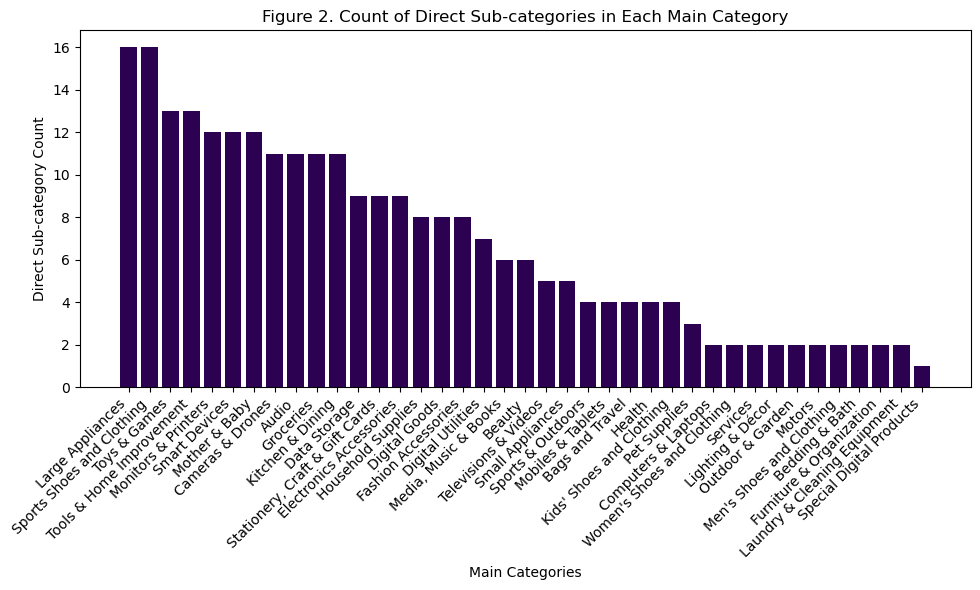

In [124]:
categories = {}

for item in all_cat_path_list:
    split_items = item.split(' > ')
    if len(split_items) >= 2:
        category = split_items[0]
        subcategory = split_items[1]
        if category not in categories:
            categories[category] = set()
        categories[category].add(subcategory)

unique_counts = {category: len(subcategories) for category, subcategories in categories.items()}
sorted_categories = dict(sorted(unique_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories.keys(), sorted_categories.values(), color='#2D0151')
plt.xlabel('Main Categories')
plt.ylabel('Direct Sub-category Count')
plt.title('Figure 2. Count of Direct Sub-categories in Each Main Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h3>Boxplot Comparison between All Listings vs Top Listings of Category Path Listings</h3>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

Secondly, the team compared the boxplots generated when comparing the distribution of price points from all listings found within the first five pages versus the top listings based on quantity sold. The idea behind the exploration was to determine if variance of price points would reduce when focusing only on products with the highest item sold counts.

Reviewing the results based on the top five category paths based on `item_sold_count`, variance and outliers are significantly reduced when limiting it to only the top listings based on `item_sold_count`. The results are displayed below in <b>Figure 3. Boxplot Comparisons of All vs Top Listings per Category Path.</b>

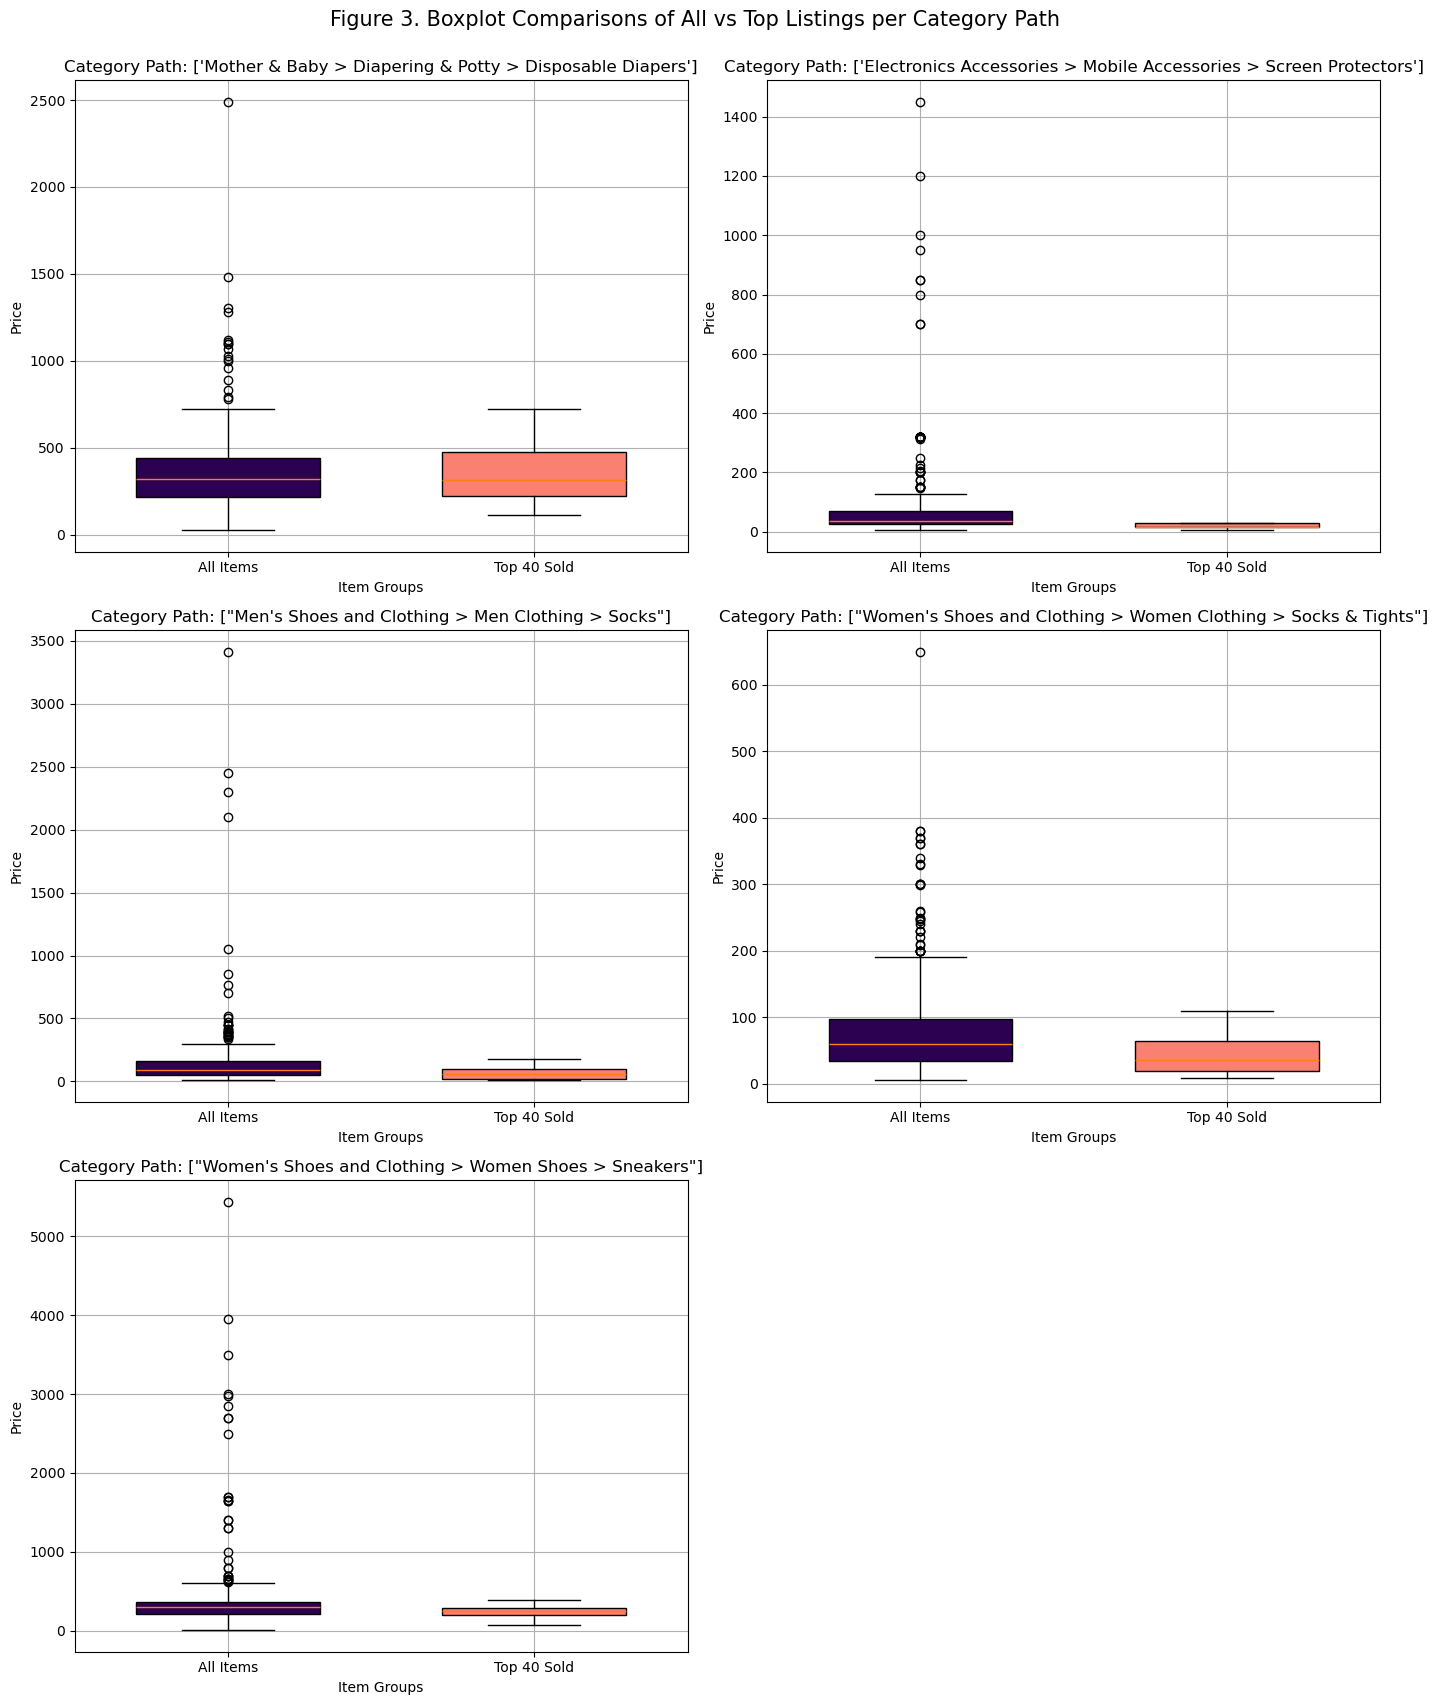

In [130]:
final_lzd_df['category_id_mod'] = final_lzd_df['category_id'].str.replace('[', '').str.replace(']', '').str.replace(',', ' >')
top_categories = final_lzd_df.groupby('category_id_mod')['item_sold_count'].sum().nlargest(5).index.tolist()

plt.figure(figsize=(14, 17))

for idx, category_id_mod in enumerate(top_categories, start=1):
    filtered_df = final_lzd_df[final_lzd_df['category_id_mod'] == category_id_mod]
    
    sorted_df = filtered_df.sort_values(by='item_sold_count', ascending=False)
    
    top_40_items = sorted_df.head(40)
    
    category_path = [k for k, v in cat_id_path_dict.items() if v == category_id_mod]
    
    plt.subplot(3, 2, idx)
    
    plt.boxplot(filtered_df['price'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#2D0151'))
    plt.boxplot(top_40_items['price'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='salmon'))
    
    plt.title(f'Category Path: {category_path}')
    plt.xticks([1, 2], ['All Items', 'Top 40 Sold'])
    plt.xlabel('Item Groups')
    plt.ylabel('Price')
    plt.grid(True)

plt.suptitle('Figure 3. Boxplot Comparisons of All vs Top Listings per Category Path', fontsize=15, y=1)
plt.tight_layout()
plt.show()

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>DATA VECTORIZATION AND FEATURE ENGINEERING</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h2>BAG-OF-WORDS REPRESENTATION</h2>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [73]:
def bow_representation(df, search_query):
    """Create a bag-of-words representation
    """
    lzd_product_names = df['name'].tolist()
    count_vect = CountVectorizer(token_pattern=r"\S+")
    lzd_bow = count_vect.fit_transform(lzd_product_names)
    search_bow = count_vect.transform(search_query)
    
    return lzd_bow, search_bow

In [101]:
search_query = ['Portable External SSD Storage Drive']

lzd_bow, search_bow = bow_representation(final_lzd_df, search_query)

In [75]:
def create_bow_df(df, bow_matrix):
    """Create a bag-of-words DataFrame
    """
    lzd_product_names = df['name'].tolist()
    count_vect = CountVectorizer(token_pattern=r"\S+")
    lzd_bow = count_vect.fit_transform(lzd_product_names)
    feature_names = count_vect.get_feature_names_out()
    bow_df = pd.DataFrame(bow_matrix.toarray(), columns=feature_names)
    
    return bow_df

In [76]:
bow_df = create_bow_df(final_lzd_df, lzd_bow)

In [77]:
start = 20
end = 22

rows_to_process = final_lzd_df['name'].iloc[start:end]
words_list = [word.lower() for row in rows_to_process for word in row.split()]

filtered_bow_df = bow_df[bow_df.columns.intersection(words_list)]
filtered_bow_df = filtered_bow_df[start:end]
filtered_bow_df.index = list(rows_to_process)

With the data collected, the text from the product names can be represented as vectors. Bag-of-words (BoW) representation can be used to achieve this. It works by representing the values of the actual text via its frequency, with each row representing an individual product name, and the columns as individual text.

<br>
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h4>1. Break Down the Product Name into Terms:</h4>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* Consider the product name `Night Cap Simple Studio Summer Hat Bucket Hat For women`. The first step is to split this name into individual terms (words).

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h4>2. Calculate Word Frequency:</h4>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* For each term in this product name, count the frequency and assign to the matrix.

Displayed below is a sample snapshot of a section in the bag-of-words representation.

In [78]:
filtered_bow_df

,[uv-08],baguio,beach,bucket,cap,city,farming,for,hat,la,...,presa,protection,shop,simple,stop,studio,summer,sun,women,|
Night Cap Simple Studio Summer Hat Bucket Hat For women,0,0,0,1,1,0,0,1,2,0,...,0,0,0,1,0,1,1,0,1,0
[UV-08] LARGE Sun Protection Hat Beach Hat Farming Hat La Presa Baguio City | Stop Ober Shop,1,1,1,0,0,1,1,0,3,1,...,1,1,1,0,1,0,0,1,0,1


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h2>BAG of WORDS WITH TF-IDF</h2>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

TF-IDF works as an extension to the bag-of-words wherein it can take into account the importance of words relative to their occurence in the corpus. In turn, it can help to reduce the importance of common words.

<br>
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h4>1. Break Down the Product Name into Terms:</h4>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* Consider the product name `Night Cap Simple Studio Summer Hat Bucket Hat For women`. The first step is to split this name into individual terms (words).

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h4>2. Calculate Term Frequency (TF):</h4>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* For each term in this product name, calculate the TF. The TF is the frequency of the term in this product name compared to the total number of terms in the name.
* The formula for TF of a term `t` is: `TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)`.

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h4>3. Calculate Inverse Document Frequency (IDF):</h4>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* Next, calculate the IDF for each term. This involves determining how many product names contain the term across the entire dataset.
* The formula for IDF of a term `t` is: `IDF(t) = log(N / nt)`, where `N` is the total number of documents (products) and `nt` is the number of documents containing term `t`.


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h4>4. Compute TF-IDF Score:</h4>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>

* For each term in the product name, calculate the TF-IDF score, which is the product of TF and IDF.
* The formula for TF-IDF is: `TF-IDF(t) = TF(t) × IDF(t)`.

By applying these steps to the `name` column, we can determine the relative importance of each term in the context of the entire dataset.

In [79]:
def bow_tfidf_representation(df, search_query):
    """Create a TD-IDF representation
    """
    lzd_product_names = df['name'].tolist()
    tfidf_vect = TfidfVectorizer()
    lzd_bow_tfidf = tfidf_vect.fit_transform(lzd_product_names)
    search_bow_tfidf = tfidf_vect.transform(search_query)
    
    return lzd_bow_tfidf, search_bow_tfidf

In [102]:
search_query = ['Portable External SSD Storage Drive']

lzd_bow_tfidf, search_bow_tfidf = bow_tfidf_representation(final_lzd_df, search_query)

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h2>COSINE SIMILARITY</h2>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [92]:
def most_similar_products_cos(df, number_of_searches, bow, search_bow):
    """Determine the most similar products based on cosine similarity
    """
    cosine_similarities = cosine_similarity(search_bow, bow)
    top_similar_indices = np.argsort(cosine_similarities[0])[::-1][:number_of_searches]

    lzd_product_names = df['name'].tolist()
    similar_list = []
    for index in top_similar_indices:
        similar_list.append({
            'row': index,
            'product_name': lzd_product_names[index],
            'cosine_similarity': cosine_similarities[0, index],
            'third_category_id': df['third_category_id'][index].astype(int),
            'price': df['price'][index],
            'item_sold_count': df['item_sold_count'][index],
            'total_revenue':  df['total_revenue'][index]
        })

    top_result_df = pd.DataFrame(similar_list)
    
    return top_result_df

In [93]:
top_result_df = most_similar_products_cos(final_lzd_df, 40, lzd_bow, search_bow)

Each product description contains various words from a predetermined vocabulary, each product will be represented as a vector of word frequencies.

Since we have 120,000+ unique products, the basic formula for cosine similarity remains the same.
 
    
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h4>1. Vector Representation:</h4>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>    
    
* Each product is represented as a vector. In a dataset with 128,000 products, this results in 128,000 vectors, denoted as $(\vec{v}_1, \vec{v}_2, ..., \vec{v}_{128000})$.


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h4>2. Cosine Similarity Formula:</h4>
    <img src='lazada_logo.png' style='height: 30px; width: auto; margin-left: auto;'>
</div>    

* The cosine similarity between any two vectors $(\vec{v}_i)$ and $(\vec{v}_j)$ is given by:
     $$ S_{\text{cos}}(\vec{v}_i, \vec{v}_j) = \frac{\vec{v}_i \cdot \vec{v}_j}{||\vec{v}_i|| \times ||\vec{v}_j||} $$
* Here, $(\vec{v}_i \cdot \vec{v}_j)$ is the dot product of the vectors, and $(||\vec{v}_i||)$ and $(||\vec{v}_j||)$ are the magnitudes (lengths) of these vectors.


The closer the cosine similarity score is to 1, the more similar the products are considered in the context of their descriptions.

Displayed below is a snapshot of the top similar results based on the cosine similarity measure.

In [94]:
top_result_df.head(15)

,row,product_name,cosine_similarity,third_category_id,price,item_sold_count,total_revenue
0,38549,WD My Passport SSD External Portable Storage S...,0.674200,24947,4480.00,0,0.00
1,118320,External SSD 256GB 512GB 1T Portable SSD USB 3...,0.664364,22059,2203.20,0,0.00
2,38708,SAMSUNG SSD T7 Portable External Solid State D...,0.632456,24947,4995.00,0,0.00
3,77930,Portable SSD 2TB External Solid State Drive 50...,0.613941,5171,3105.00,0,0.00
4,38721,Toshiba Dynabook Boost X20 250GB USB 3.2 Porta...,0.597614,24947,2609.00,0,0.00
5,38702,Kingston 2TB XS2000 Portable SSD High-performa...,0.596285,24947,12428.00,12,149136.00
6,38602,Kingston 500GB XS2000 Portable SSD High-perfor...,0.596285,24947,4742.00,10,47420.00
7,38732,Samsung MU-PC 500GB T7 Portable Solid State Dr...,0.574989,24947,4838.00,11,53218.00
8,38577,Kingston XS2000 500GB/1TB/2TB High-performance...,0.565685,24947,4742.00,44,208648.00
9,38716,Kingston XS2000 500GB Portable SSD High-perfor...,0.565685,24947,3950.00,0,0.00


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h2>COSINE SIMILARITY WITH TF-IDF</h2>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [95]:
top_result_tfidf_df = most_similar_products_cos(final_lzd_df, 40, lzd_bow_tfidf, search_bow_tfidf)

Cosine similarity can also be measured using Bag-of-Words vectorized using TF-IDF. The results will be compared in the performance evaluations to determine which vectorization method yields the best performance consistently.

Displayed below is a snapshot of the top similar products based on cosine similarity measures that is TF-IDF vectorized.

In [96]:
top_result_tfidf_df.head(15)

,row,product_name,cosine_similarity,third_category_id,price,item_sold_count,total_revenue
0,38732,Samsung MU-PC 500GB T7 Portable Solid State Dr...,0.642963,24947,4838.00,11,53218.00
1,118320,External SSD 256GB 512GB 1T Portable SSD USB 3...,0.632914,22059,2203.20,0,0.00
2,77930,Portable SSD 2TB External Solid State Drive 50...,0.572462,5171,3105.00,0,0.00
3,38654,Transcend ESD260C USB 3.2 Gen 2 Type-C Portabl...,0.561779,24947,3284.00,59,193756.00
4,38549,WD My Passport SSD External Portable Storage S...,0.558294,24947,4480.00,0,0.00
5,38708,SAMSUNG SSD T7 Portable External Solid State D...,0.556395,24947,4995.00,0,0.00
6,38544,Western Digital 1TB WD External Hard Drive Sto...,0.529245,24947,1200.00,0,0.00
7,94226,Toshiba Canvio Basics 1TB 2TB External Hard Dr...,0.512578,5180,1608.26,1162,1868798.12
8,38679,Samsung 4TB T7 Shield USB 3.2 Portable SSD | ...,0.509955,24947,16998.00,26,441948.00
9,94106,Seagate Backup Plus Slim External Hard Drive E...,0.508420,5180,726.53,0,0.00


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>PERFORMANCE EVALUATIONS</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>

In [161]:
count_vector_df = pd.read_csv('count_vector.csv', usecols=['search_query', 'product_name', 'validation'])

In [176]:
count_vector_df.head()

,search_query,product_name,validation,ranking
0,Professional Cordless Drill Set with Accessories,DeWALT 88V cordless impact wrench with accesso...,1.0,1
1,Professional Cordless Drill Set with Accessories,NewSun DeWALT Cordless Drill Driver 28V 2-Spee...,1.0,2
2,Professional Cordless Drill Set with Accessories,2in1 Set Electric Impact Drill And Angle Grind...,1.0,3
3,Professional Cordless Drill Set with Accessories,【Professional Grinder Set Drill】Mitsushi 2 i...,1.0,4
4,Professional Cordless Drill Set with Accessories,Cordless Impact Wrench With 1 Li-ion Batteries...,0.0,5


In [163]:
print(f'Total count vector manually labeled entries: {len(count_vector_df)}')

Total count vector manually labeled entries: 400


In [195]:
def graph_precision(df, vector_type, figure_num):
    """Calculate and graph the precision of the similarity results
    """
    df['ranking'] = np.tile(np.arange(1, 41), 400 // 40 + 1)[:400]
    df_ranks = df.groupby('ranking')['validation'].sum()
    
    df_ranks_cum = pd.DataFrame(df_ranks)
    df_ranks_cum['cumulative_ranking'] = df_ranks_cum['validation'].cumsum()
    df_ranks_cum.reset_index(inplace=True)
    df_ranks_cum['ranking']=df_ranks_cum['ranking']*10
    df_ranks_cum['precision'] = df_ranks_cum['cumulative_ranking']/df_ranks_cum['ranking']
    df_ranks_cum = df_ranks_cum.drop(['validation', 'cumulative_ranking'], axis=1)
    df_ranks_cum['count'] = df_ranks_cum['ranking'] / 10
    df_ranks_cum.plot(x='count', y='precision',marker ='o', linestyle='-', color='#9400D3', figsize=(10, 6)) 
    
    plt.xlabel('Count')
    plt.ylabel('Precision')
    plt.title(f'Figure {figure_num}. {vector_type} Precision')
    plt.legend(['Precision'], loc='upper right')
    plt.show()

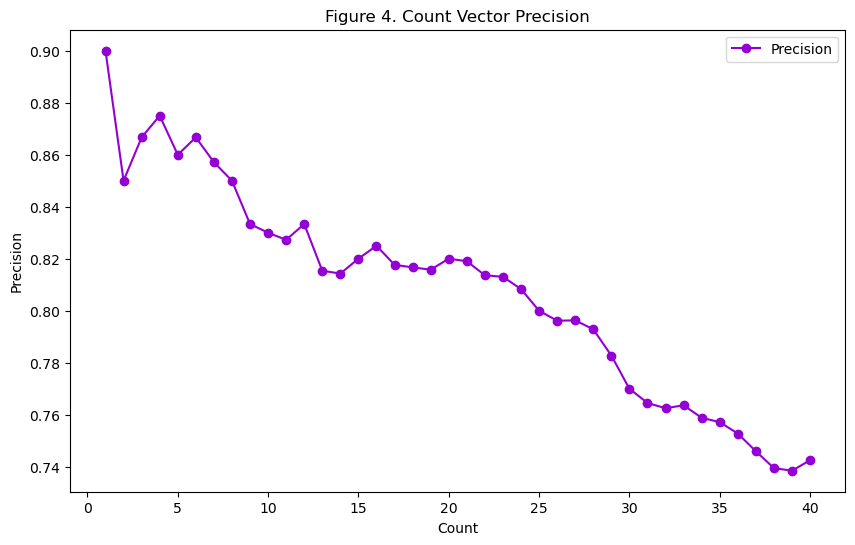

In [196]:
graph_precision(count_vector_df, 'Count Vector', 4)

In [197]:
tfidf_df = pd.read_csv('tfidf.csv', usecols=['search_query', 'product_name', 'validation'])

In [198]:
tfidf_df.head()

,search_query,product_name,validation
0,High-Performance Running Shoes with Cushioning,【Professional Grinder Set Drill】Mitsushi 2 i...,1
1,High-Performance Running Shoes with Cushioning,MANSOON cordless rotary hammer drill brushless...,1
2,High-Performance Running Shoes with Cushioning,DeWALT 88V cordless impact wrench with accesso...,1
3,High-Performance Running Shoes with Cushioning,MAKlTA Cordless Electric Drill Cordless Hand D...,1
4,High-Performance Running Shoes with Cushioning,2 in 1 Grinder With Drill Set,1


In [199]:
print(f'Total count vector manually labeled entries: {len(tfidf_df)}')

Total count vector manually labeled entries: 400


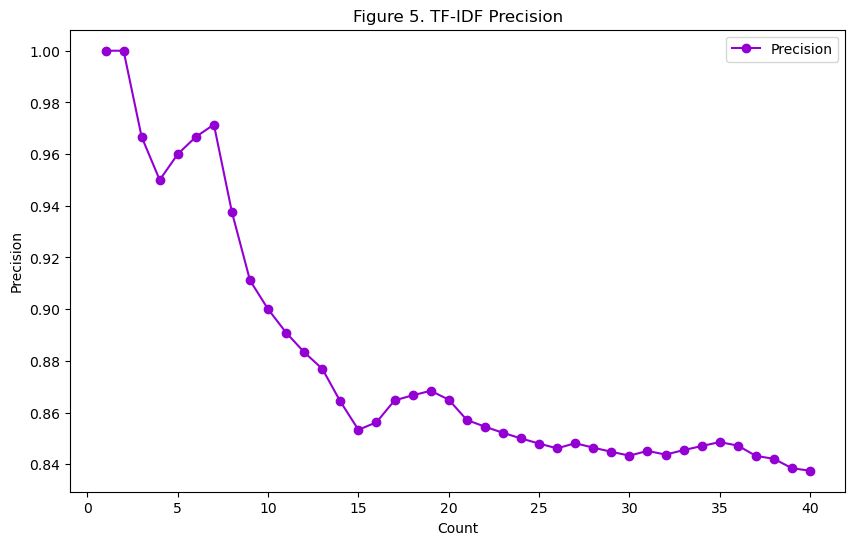

In [200]:
graph_precision(tfidf_df, 'TF-IDF', 5)

Given the results displayed in <b>Figure 4. Count Vector Precision</b> and <b>Figure 5. TF-IDF Precision</b>, we can conclude that the TF-IDF improves the performance of the similarity measure when computing using the precision metric. Additionally, when determing the recommended categories and suggested pricing can utilize, up to 40 similar listings can be used as it guarantees up to at least 84% precision score.

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>RESULTS</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>


In [119]:
def create_unique_categories_dict(dct):
    """Create a dictionary with the third level categories and IDs
    """
    unique_cats = {}

    for key, value in dct.items():
        cats = key.split(' > ')
        ids = value.split(' > ')
        for cat, cat_id in zip(cats, ids):
            unique_cats[cat] = cat_id

    return unique_cats

In [120]:
third_level_cat_id_dict = create_unique_categories_dict(cat_id_path_dict)

Prior to consolidating printing the results, the `cat_id_path_dict` was further simplified down to the third level categories and corresponding IDs. The function `create_unique_categories_dict` creates the new dictionary `third_level_cat_id_dict`, as seen in the snapshot found below.

In [114]:
list(third_level_cat_id_dict.items())[:10]

[('Sports & Outdoors', '4623'),
 ('Outdoor Recreation', '7654'),
 ('Camping & Hiking', '7657'),
 ('Tents', '7665'),
 ('Sleeping Gear', '10119'),
 ('Sleeping Bags', '5432'),
 ('Air Mattresses', '10120'),
 ('Sleeping Pads', '10121'),
 ('Pillows & Accessories', '10122'),
 ('Cots', '21730')]

In [121]:
def best_category_and_suggested_price(df, search_query):
    """Return the recommended category and price based on similarity and sold
    """
    df = df[df['cosine_similarity'] != 0]
    highest_sold_df = df.groupby(
        'third_category_id')['item_sold_count'].sum().reset_index()
    cat_with_highest_sold_df = highest_sold_df.sort_values(
        by='item_sold_count', ascending=False, ignore_index=True)
    cat_with_highest_sold_df.head(5)
    best_cat_id = cat_with_highest_sold_df['third_category_id'][0]
    
    best_cat = [k for k, v in third_level_cat_id_dict.items() if v == str(best_cat_id)]

    total_cat_revenue = df[df['third_category_id'] == best_cat_id]['total_revenue'].sum()
    total_cat_sold = df[df['third_category_id'] == best_cat_id]['item_sold_count'].sum()
    suggested_price = total_cat_revenue / total_cat_sold
    
    return print(f'Product to Categorize: {search_query}\nBest Category: {best_cat}\nSuggested price: ₱{suggested_price}\n')

Finally, the function `best_category_and_suggested_price` gives us the recommended best category and price choice. The recommendation was computed by grouping the top similarity results based on category. Categories that garnered the highest item sold count would be weighted the highest and be recommended.

Afterwards, the suggested pricing was based on the average weight price for listings that were both represented in the top similarity results, and who fell under the recommended best category choice.

The results of the search query `Portable External SSD Storage Drive` is presented below.

In [122]:
search_query = ['Portable External SSD Storage Drive']

best_category_and_suggested_price(top_result_tfidf_df, search_query)

Product to Categorize: ['Portable External SSD Storage Drive']
Best Category: ['External hard Drives']
Suggested price: ₱1690.9514084334396



<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>CONCLUSION & INSIGHTS</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>



Our information retrieval model for LAZADA E-Commerce significantly **improved product categorization accuracy**. We moved from a Bag of Words to a **TF-IDF approach**, **increasing accuracy from 46% to over 60%**. Expanding and refining our dataset led to an **65% accuracy in cosine similarity**. We used **NMF for better accuracy** and **limited our scope to three category layers for efficiency**. This resulted in **more precise and user-relevant product recommendations**.

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>FURTHER RECOMMENDATIONS</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>


These are the group's proposed recommendations to improve the Information Retrieval system they did.

1. **Detailed Product Categorization:** Expanding to all category layers allows for more precise product placement. Sellers can target their products more accurately, increasing visibility to the right customer segments. This specificity can lead to higher sales conversions and customer satisfaction.

2. **Comprehensive Product Insights:** Increasing the depth of web scraping provides a richer dataset, offering sellers better insights into market trends, customer preferences, and competitor strategies. This information is crucial for making informed decisions about product development, pricing, and marketing strategies.

3. **Efficient Data Access:** Becoming a software service provider for centralized data access ensures sellers receive up-to-date and accurate information about prices, quantities, and categories. This can lead to better inventory management, pricing strategies, and quicker responses to market changes.

4. **Enhanced Personalization:** Allowing buyers to exclude certain categories improves the relevance of search results. For sellers, this means their products are more likely to be shown to interested customers, reducing marketing waste and increasing the chances of sales.


<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>BUSINESS VALUE</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>


By shifting to a TF-IDF approach from the Bag of Words model, our information retrieval system for LAZADA E-Commerce will significantly **enhance product categorization accuracy**, expected to increase from 46% to over 60%. This precise categorization will be pivotal for sellers, leading to **improved targeting** and potentially higher sales conversions. Furthermore, the anticipated increase in cosine similarity accuracy to 85% will streamline the **product discovery process**, making it easier for customers to find what they're searching for, thereby driving sales. For sellers, this means a smoother and more effective path to reaching potential buyers.

Simultaneously, these improvements will greatly aid in **optimizing inventory management**. The insights gained from more accurate and relevant product recommendations will enable sellers to better align their stock with customer demands and trends. This alignment will reduce the risks of overstocking or stockouts, ensuring a more efficient inventory process. Additionally, the technological advancements will provide a significant **competitive edge** on the LAZADA platform. Sellers will benefit from being part of a platform that boasts advanced, user-friendly search and recommendation capabilities, attracting more customers and increasing the potential for sales.

<div style='display: flex; justify-content: space-between; align-items: center; background-color: #2D0151; color: white; padding: 10px; width: 100%;'>
    <h1>REFERENCES</h1>
    <img src='lazada_logo.png' style='height: 50px; width: auto; margin-left: auto;'>
</div>


"Lazada Open Platform." Lazada, 24 November 2023, https://open.lazada.com/.

"Lazada Philippines." Lazada, 24 November 2023, https://www.lazada.com.ph/?spm=a2o4l.searchlist.header.dhome.4d2f4269DMla5M."Lazada Philippines."

ChatGPT. "Conversation on Information Retrieval, Cosine Similarity, Precision and Recall, Bag of Words, TFIDF." Personal interview. 24 November 2023.

Wu, Songhao. "Web Scraping Basics: How to Scrape Data from a Website in Python." Towards Data Science, Medium, 15 July 2020, https://towardsdatascience.com/web-scraping-basics-82f8b5acd45c.

Actowiz Solutions. "The Ultimate Guide to Scrape Lazada Product Data." Medium, 14 July [Year], https://medium.com/@actowizsolutions/the-ultimate-guide-to-scrape-lazada-product-data-c256a6c0b0aa.

Seelam, Sindhu. "Machine Learning Fundamentals: Cosine Similarity and Cosine Distance." Geek Culture, Medium, 26 May 2021, https://medium.com/geekculture/cosine-similarity-and-cosine-distance-48eed889a5c4.